In [40]:
#Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Keras packages for neural network design
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model
from keras import regularizers

#Load the Fashion-MNIST Data Set
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [41]:
#Set a random seed for reproducibility.
np.random.seed(42)

#Load in the Fashion MNIST data set.
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Reshape the data to have depth of 1.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Grayscale values run from 0 to 256.  This scales that data to a 0 to 1 range and converts to float.
#Perhaps unnecessary with Fashion MNIST, but scaling like this is best practice with image data.
#It also may improve computation efficiency.
x_train = x_train/255.
x_test = x_test/255.

#The target variable needs to be one-hot encoded, i.e.; converted into a purely categorical form.
#Leaving it as 0-9 would create false proximity relationships between the categories.
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [42]:
#The top-performing convolutional neural network structure (Accuracy > 0.93)
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

#ModelCheckpoint allows us to extract the best end-of-epoch model.
#Under different circumstances, we might monitor validation loss instead of validation accuracy.
callback_list=[ModelCheckpoint(filepath='cnn.h5', monitor='val_accuracy', save_best_only=True, mode='max')]



In [43]:
def accuracy_loss_plots(model):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    ax1.plot(model.history.history['val_accuracy'], label='Validation Accuracy')  # Updated key
    ax1.plot(model.history.history['accuracy'], label='Training Accuracy')  # Added for training accuracy
    ax1.set_title('Accuracy by Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0.8, 1)
    ax1.legend()

    ax2.plot(model.history.history['loss'], label='Training Loss')
    ax2.plot(model.history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss by Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.set_ylim(0, 1)
    ax2.legend()

Epoch 1/20
469/469 [==============================] - 58s 122ms/step - loss: 0.5868 - accuracy: 0.7937 - val_loss: 0.5537 - val_accuracy: 0.8812
Epoch 2/20
469/469 [==============================] - 55s 117ms/step - loss: 0.3479 - accuracy: 0.8748 - val_loss: 0.2812 - val_accuracy: 0.8966
Epoch 3/20
469/469 [==============================] - 52s 111ms/step - loss: 0.2935 - accuracy: 0.8943 - val_loss: 0.2488 - val_accuracy: 0.9088
Epoch 4/20
469/469 [==============================] - 54s 116ms/step - loss: 0.2597 - accuracy: 0.9050 - val_loss: 0.2640 - val_accuracy: 0.9029
Epoch 5/20
469/469 [==============================] - 53s 113ms/step - loss: 0.2380 - accuracy: 0.9135 - val_loss: 0.2288 - val_accuracy: 0.9158
Epoch 6/20
469/469 [==============================] - 51s 109ms/step - loss: 0.2252 - accuracy: 0.9165 - val_loss: 0.2176 - val_accuracy: 0.9204
Epoch 7/20
469/469 [==============================] - 47s 101ms/step - loss: 0.2066 - accuracy: 0.9227 - val_loss: 0.2145 - val_ac

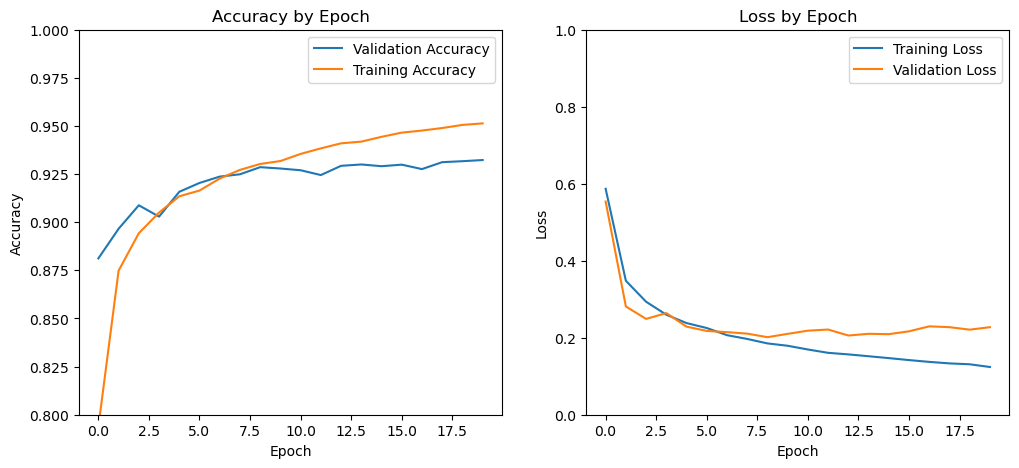

In [44]:
cnn.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=20, verbose=1, callbacks=callback_list)
accuracy_loss_plots(cnn)

In [45]:
#Load in the best model state from ModelCheckpoint
cnn_best = load_model('cnn.h5')
#Confirm loss and accuracy on the test data
cnn_best.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2274 - accuracy: 0.9323


[0.22736120223999023, 0.9322999715805054]

In [46]:
cnn_best.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_16 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 dropout_17 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 24)        6936      
                                                      

313/313 [==============================] - 3s 9ms/step


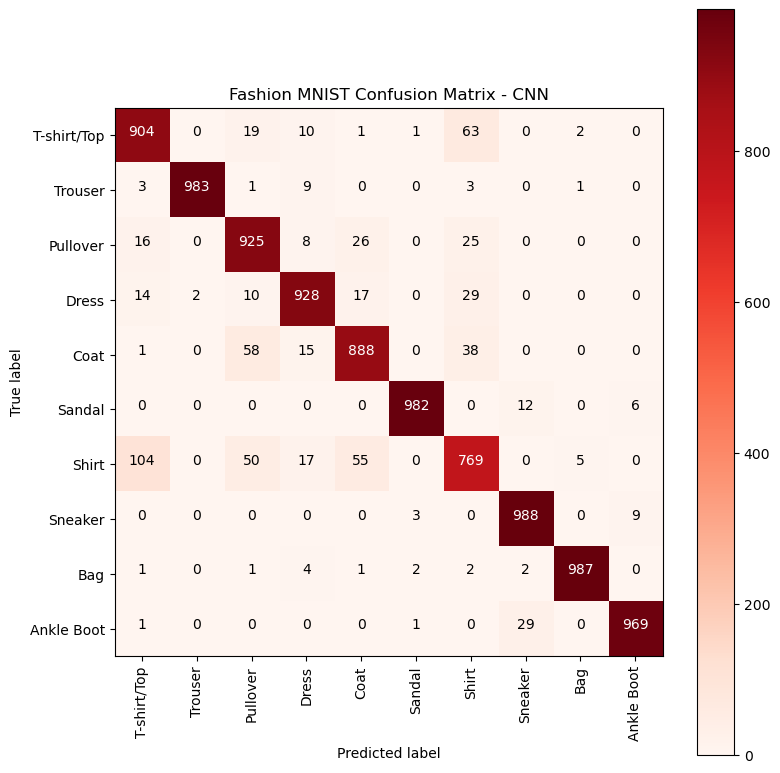

In [47]:
from sklearn.metrics import confusion_matrix
from itertools import product

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

#Create Multiclass Confusion Matrix

preds = cnn_best.predict(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Fashion MNIST Confusion Matrix - CNN')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');